<a href="https://colab.research.google.com/github/sandhyajnv/Digital-image-processing/blob/main/DIP_Assignment0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math 
import cv2
import os
import pandas as pd

**1.1**> Reading and plotting an image

In [ ]:
lana_arr = mpimg.imread('/content/lena.jpg')
lana_arr = lana_arr[:, :, 0]

print(lana_arr)

[[160 160 160 ... 169 155 130]
 [160 161 160 ... 167 153 128]
 [161 161 160 ... 172 156 130]
 ...
 [ 50  49  56 ... 107 105 106]
 [ 48  49  59 ... 107 106 109]
 [ 50  49  58 ... 107 108 113]]


Plotting the gray image

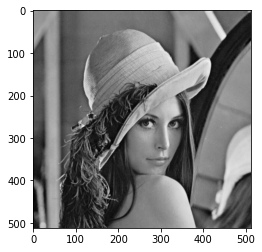

In [ ]:
imgplot = plt.imshow(lana_arr, cmap= 'gray')

**1.2**> Printing minimum and maximum value in image array and its resolution

In [ ]:
min=np.min(lana_arr)
max=np.max(lana_arr)

print("minimum and maximum value ={},{}".format(min,max))
shape=np.shape(lana_arr)
resolution=shape[0]*shape[1]
print("Resolution={}".format(resolution))


minimum and maximum value =34,245
Resolution=262144


**1.3**> And yes image is compressed for storage

In [ ]:
import os
size=os.path.getsize("/content/lena.jpg")
print("size from the image {} kb".format(resolution/1024))
print("size from the device {} kb".format((size)/1024))
compression_efficiency=((resolution-size)/resolution)*100
print("compression_efficiency={}%".format(compression_efficiency))

size from the image 256.0 kb
size from the device 83.3935546875 kb
compression_efficiency=67.42439270019531%


Function for decimal to binary conversion

**1.4**> Function to get bit- plane of an image 

In [ ]:
def bit_plane(arr,p):
  a=np.zeros(arr.shape)
  max=np.max(arr)
  s=round(np.log2(max))
  for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
      a[i,j]=np.flip(np.binary_repr(arr[i,j],s))[p]
  return(a)


Plotting images of all bit-planes

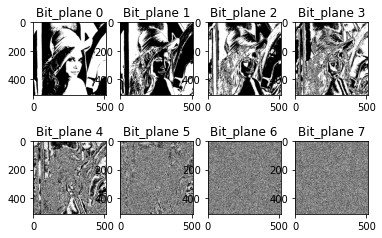

In [ ]:
max=np.max(lana_arr)
s=round(np.log2(max)) # number of bits required for binary representation of each pixel value
for i in range(1,s+1):

  plt.subplot(2,int(s/2),i)
  plt.title("Bit_plane {}".format(i-1))
  plt.imshow(bit_plane(lana_arr,i-1),cmap= 'gray')



**1.5**> Written a function to Quantize the image in 8,4,2,1 bit

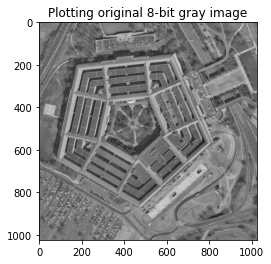

In [ ]:
pentagon_arr = mpimg.imread('/content/3.2.25.tiff')
plt.title("Plotting original 8-bit gray image")
plt.imshow(pentagon_arr,cmap="gray")
def Quantization_level(arr,n):
  level=2**n
  arr=arr/255
  arr=np.int_(arr*(level-1))
  return(arr)


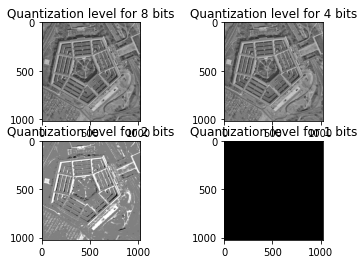

In [ ]:
i=1
for bit in [8,4,2,1]:

  plt.subplot(2,2,i)
  plt.title("Quantization level for {} bits".format(bit))
  plt.imshow(Quantization_level(pentagon_arr,bit),cmap= 'gray')
  i+=1



In [ ]:
from google.colab.patches import cv2_imshow

**2.1**

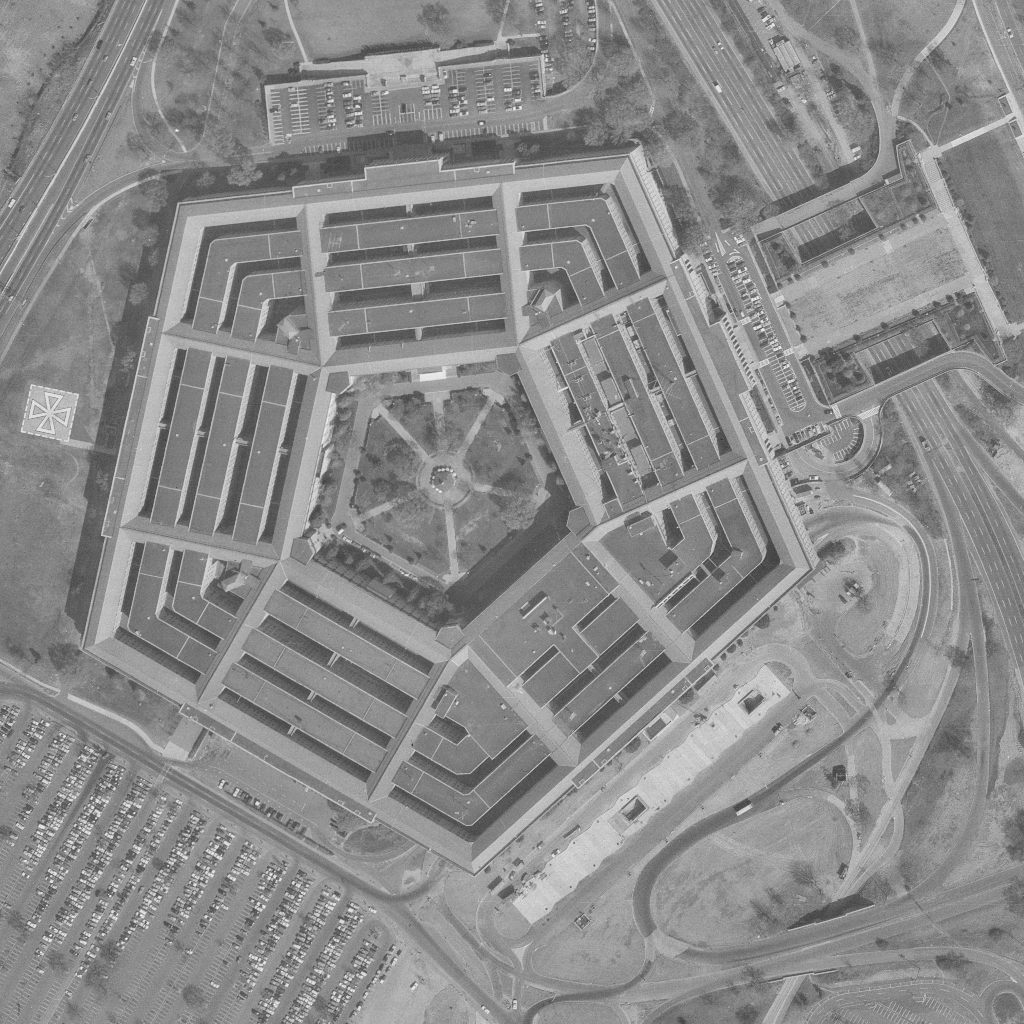

In [ ]:
pentagon_arr = cv2.imread('/content/3.2.25.tiff')
cv2_imshow(pentagon_arr)


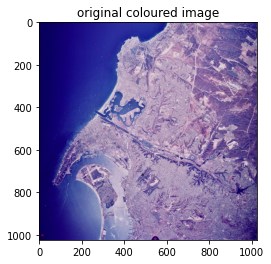

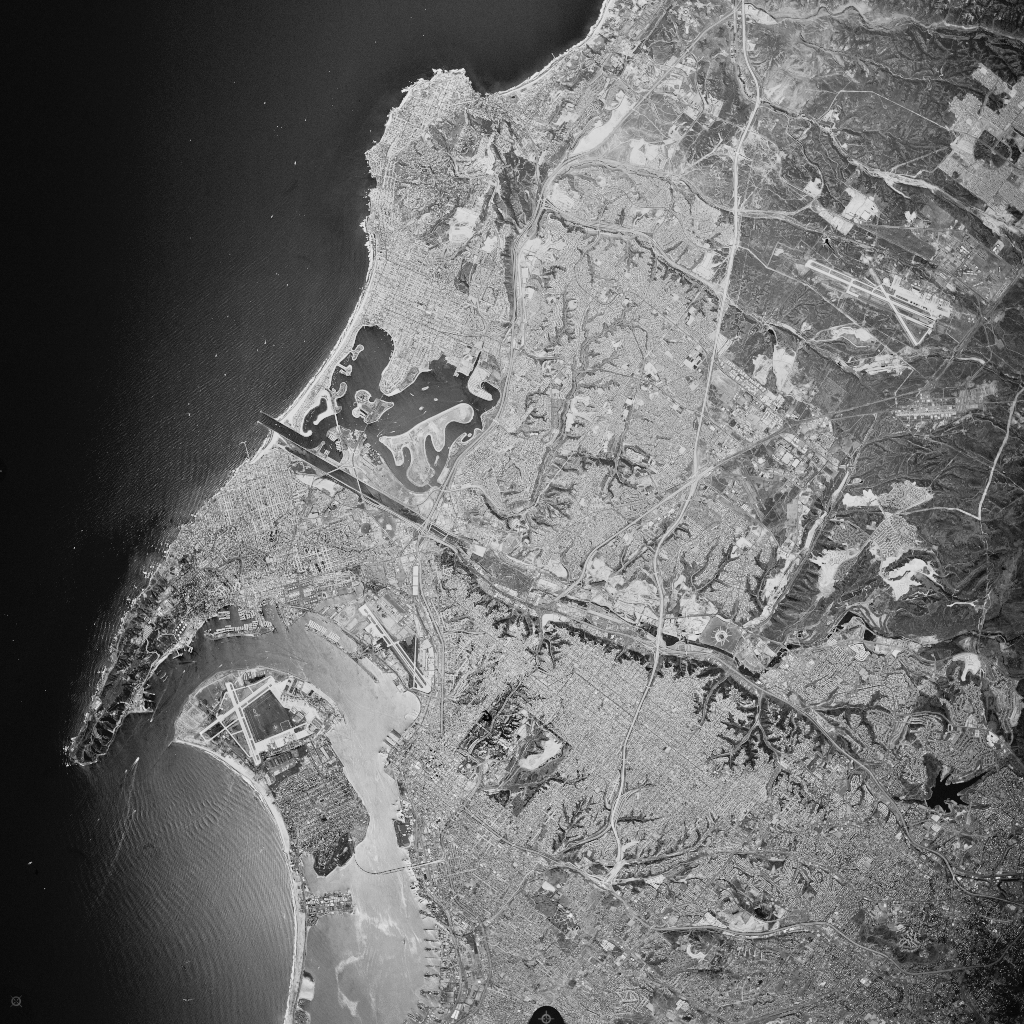

In [ ]:
sea_arr = mpimg.imread('/content/2.2.01.tiff')
plt.title("original coloured image")
plt.imshow(sea_arr)
plt.show()

r,g,b=sea_arr[:,:,0],sea_arr[:,:,1],sea_arr[:,:,2]
gray=0.2989*r + 0.5870*g + 0.1140*b # converting RGB image to gray image

cv2_imshow(gray)# Plotting gray image









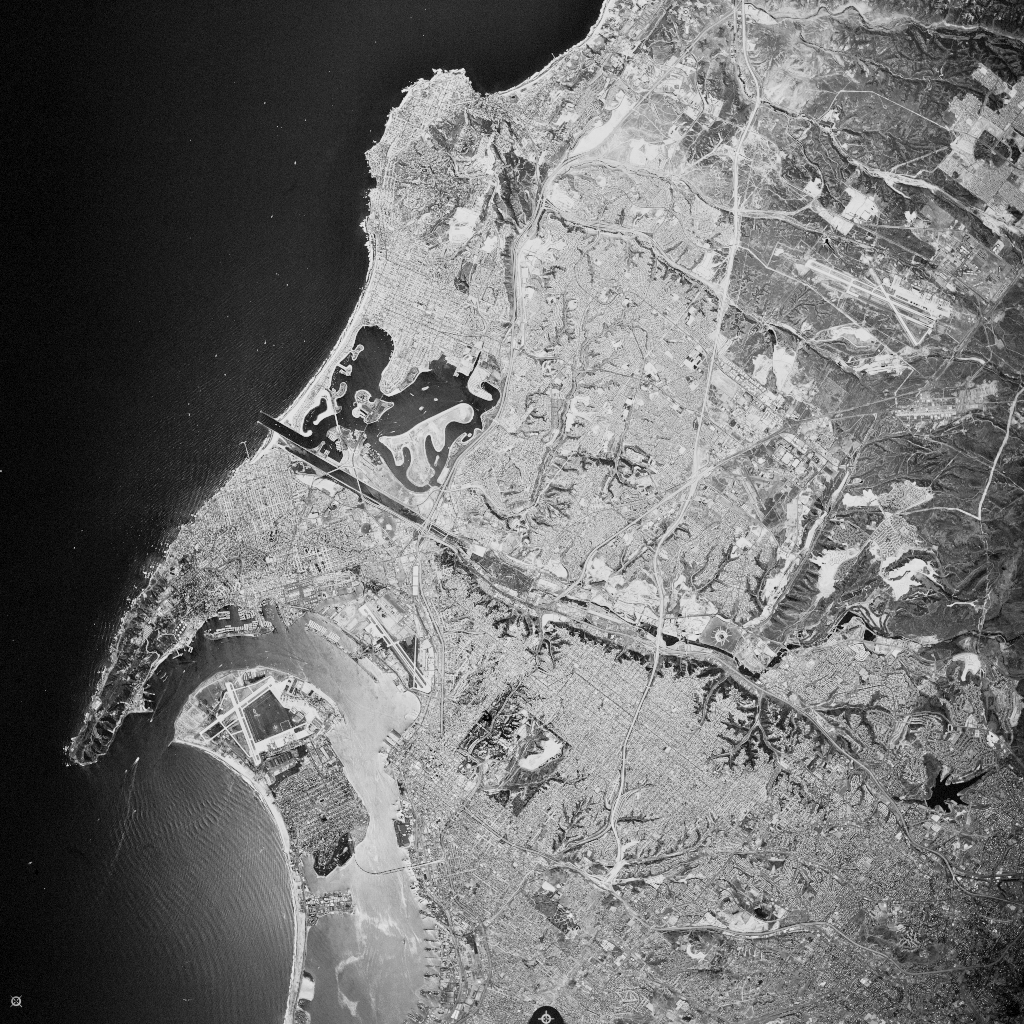

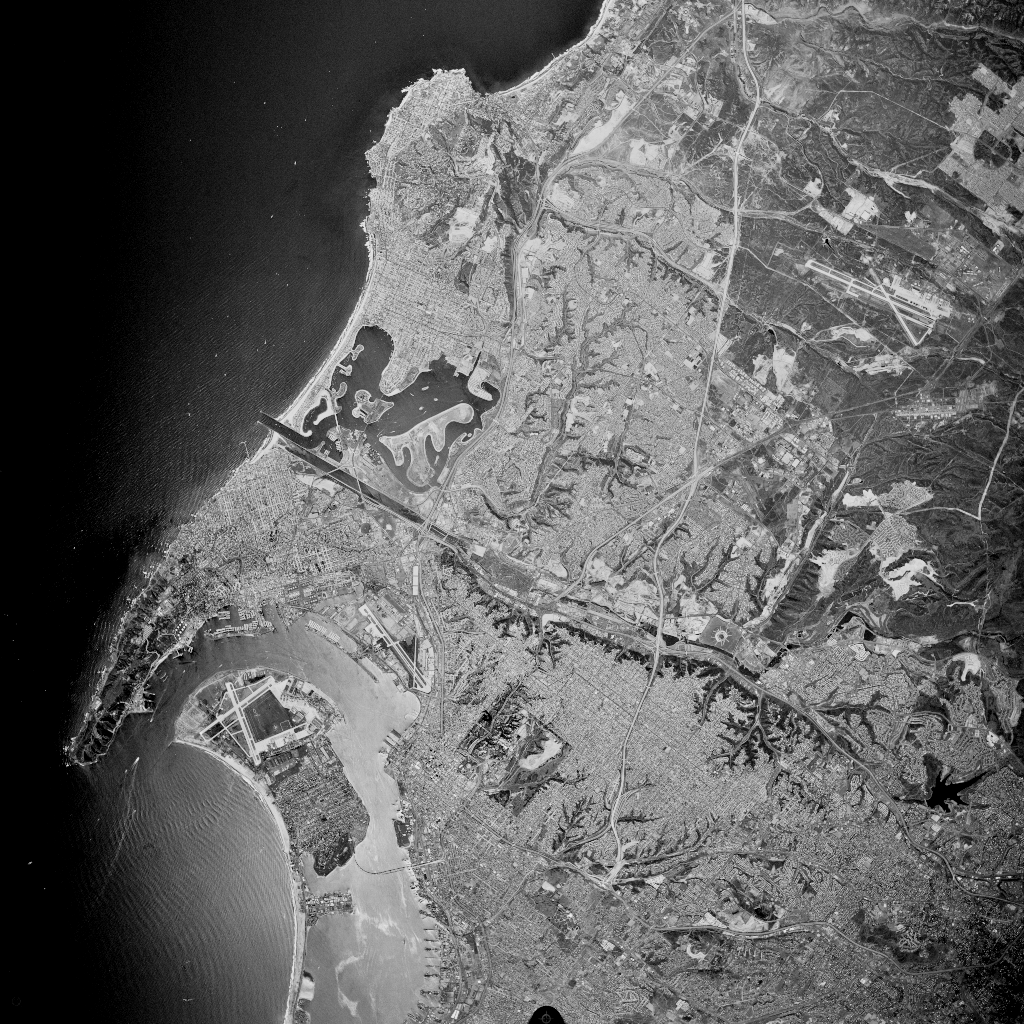

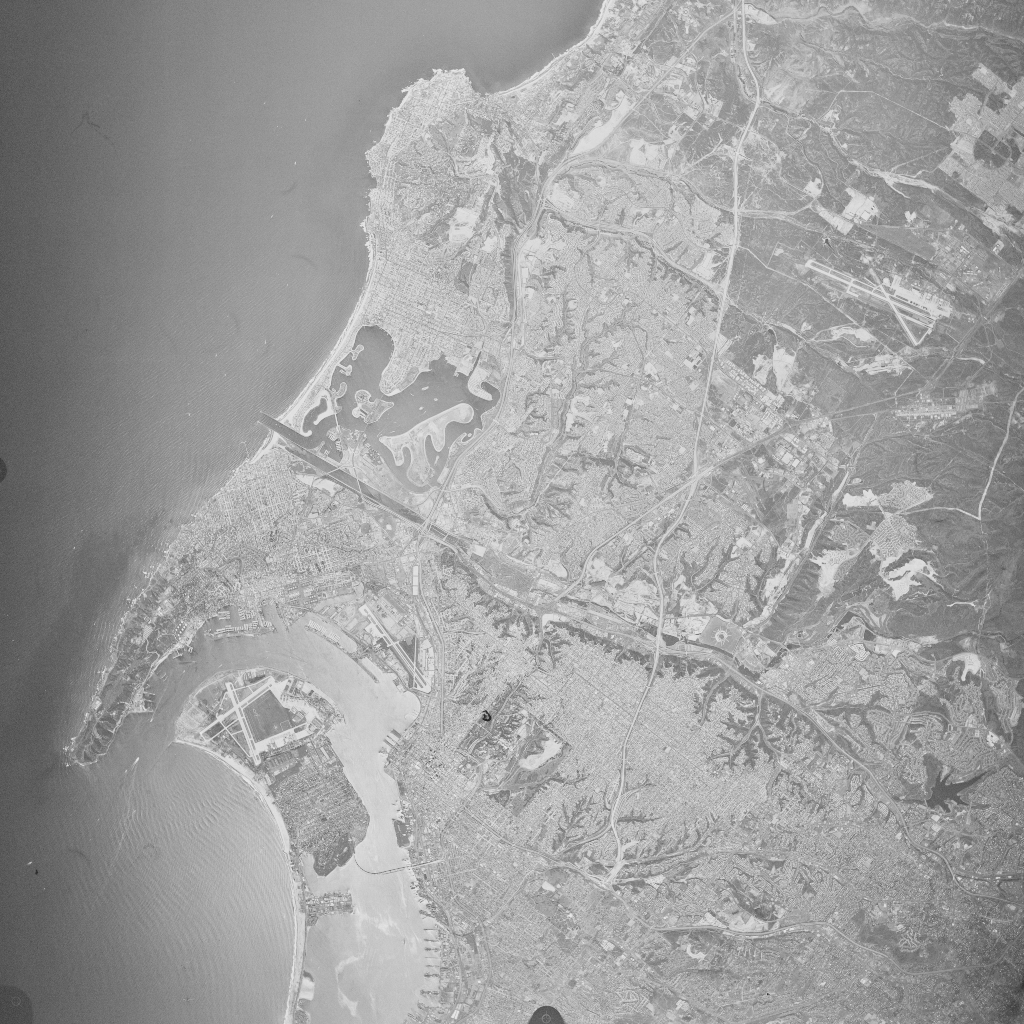

In [ ]:
i=0
for colour in ["red","green","blue"]:
  
  
 # Showing Red ,Green and Blue channel of image
  cv2_imshow(sea_arr[:,:,i])
  i+=1


In [ ]:

def Quantization_level(arr,n):
  level=2**n
  arr=arr/255
  arr=np.int_(arr*(level-1))
  return(arr)

**2.2**> Writing a function to get maximum occuring colour in an image

In [ ]:
def CalculateMaxColour(path):# provide path to the image in the function 
  img=mpimg.imread(path)
  img=img.reshape(-1,3)
  img,count=np.unique(img,axis=0,return_counts=True)
  max=np.argmax(count) # calculating the maximum occuring colour
  max_colour=img[max] 
  max_colour=max_colour.reshape(1,1,3)
  return(max_colour)# returns array 


**2.3**>  Merging foreground and background image

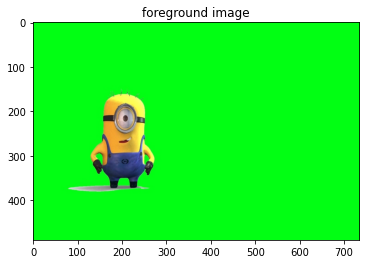

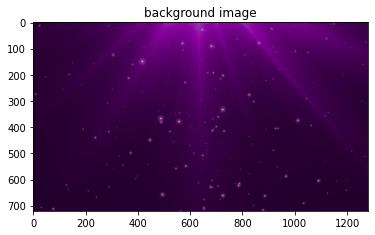

In [ ]:
fgo=mpimg.imread("/content/fg1 (1).jpg") # load foreground image
plt.title("foreground image")
plt.imshow(fgo)
plt.show()

fg=fgo.reshape(-1,3)
bg=mpimg.imread("/content/bg.jpg")# load background image
plt.title("background image")
plt.imshow(bg)
plt.show()
fg,count=np.unique(fg,axis=0,return_counts=True) # calculating unique RGB values in the array

max=np.argmax(count) # calculating the maximum occuring colour
max_colour=fg[max]  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          




bg=np.resize(bg,fgo.shape)

combined=[]
for i in range(fgo.shape[0]):
  for j in range(fgo.shape[1]):
    if list(fgo[i][j])==list(max_colour): # if foreground pixel has maximum occuring colour then replace it with background image pixel
      combined.append(bg[i][j])

    else:
      combined.append(fgo[i][j])



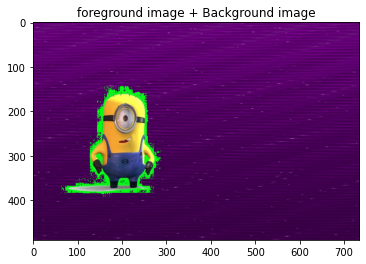

In [ ]:
combined=np.array(combined)# this list stores the all pixel value of combined image
combined=combined.reshape((bg.shape))# reshaping it to the size of background image
plt.title("foreground image + Background image")
plt.imshow(combined)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**3.1**

In [ ]:
cam = cv2.VideoCapture("/content/drive/MyDrive/production ID_3756003.mp4")


In [ ]:
try:
      
 
    if not os.path.exists('data'):
        os.makedirs('data')

except OSError:
    print ('Error: Creating directory of data')
  
# frame
currentframe = 0
  
while(True):
      
   
    ret,frame = cam.read()
  
    if ret:
       
        name = './data/frame' + str(currentframe) + '.jpg'
       
  
        cv2.imwrite(name, frame)
  
     
        currentframe += 1
    else:
        break
  

cam.release()
cv2.destroyAllWindows()

**3.2**

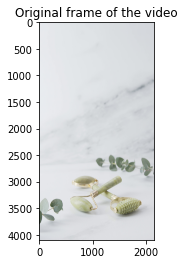

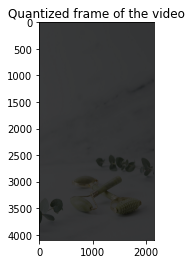

In [ ]:
# showing a quantized frame of the video
img=plt.imread("/content/data/frame250.jpg")
plt.title("Original frame of the video")
plt.imshow(img)
plt.show()
bit=6 # providing number of bits for quantization
img_arr=Quantization_level(img,bit)
plt.title("Quantized frame of the video")
plt.imshow(img_arr)
plt.show()


In [ ]:

files=os.listdir("/content/data")

try:
      
 
    if not os.path.exists('dataQ'):
        os.makedirs('dataQ')

except OSError:
    print ('Error: Creating directory of data')
  
for i in range(len(files)):
  img_arr=mpimg.imread("/content/data/frame{}.jpg".format(i))
  img_arr=Quantization_level(img_arr,6)
  name = './dataQ/frame' + str(i) + '.jpg'
 
  
  cv2.imwrite(name, img_arr)
  
     
        
  

In [ ]:
img=plt.imread("/content/dataQ/frame250.jpg")

frameSize =img.shape
frameSize=list(frameSize)
frameSize=frameSize[:2]
frameSize.reverse()
cv2_fourcc=cv2.VideoWriter_fourcc(*"mp4v")
# video is stored in ProductionVideo.mp4
out = cv2.VideoWriter('/content/ProductionVideo.mp4',cv2_fourcc, 24, frameSize)
files=os.listdir("/content/data")
for i in range(len(files)):
 
  img = cv2.imread("/content/data/frame{}".format(i))
  out.write(img)

out.release()